![alt text](Capture8.png "Title")

###  <font color=red>Working with MNIST Dataset</font> ###

__In this question, you are given the MNIST dataset, which consists of 70,000 images of digits handwritten by students and employees of US Census Bureau.__

You are supposed to perform a binary classification task, separating digit 4 from others (0,1,2,3,5,6,7,8,9). The data could be downloaded using the code below:

In [162]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### <font color=green>1:</font> ###

__In the first step, you are going to get acquainted with the dataset.__

Randomly, plot three digits from the dataset.

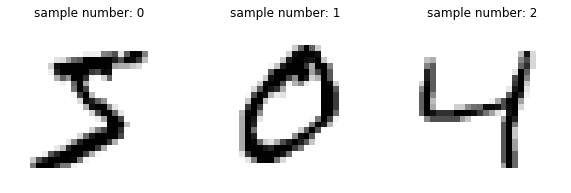

In [163]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3, figsize=(10,3))
axes = axes.flatten()
for i in range(3):
    axes[i].set_axis_off()
    axes[i].imshow(X[i].reshape((28,28)), cmap=plt.cm.gray_r)
    axes[i].set_title('sample number: ' +str(i))

### <font color=green>2:</font> ###
__In the second step, you should build your dataset. Do as follows:__
* Split your training and testing dataset (80% and 20%).
* Set the random_state to 10.
* As your goal is to identify digit 4, create the target vectors for this classification task  <font color=red>(note that you are training a binary classifier)</font>

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np

TARGET_CLASS = 4

y_binary = label_binarize(y, classes=np.unique(y))[:,TARGET_CLASS]
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=10)

### <font color=green>3:</font> ###
__Do the classification task using a <font color=red>Gaussian Naive Bayes Classifier</font>__

In [165]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train);

### <font color=green>4:</font> ###
__Calculate the following values:__
* Confusion Matrix
* Accuracy
* Sensitivity
* Specificity
* Precision
* Recall

#### specificity = recall of positive class
#### sensitivity = recall of negetive class

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

def report_results(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print('################################################')
    print('accuracy = ', round(clf.score(X_test, y_test) * 100, 1), '%')
    print('################################################')
    print(classification_report(y_test, y_pred))
    print('################################################')
    disp = plot_confusion_matrix(clf, X_test, y_test, values_format = '.5g')
    disp.figure_.suptitle("Confusion Matrix")
    print("Confusion matrix:\n%s" % disp.confusion_matrix)

################################################
accuracy =  40.3 %
################################################
              precision    recall  f1-score   support

           0       0.99      0.34      0.51     12609
           1       0.14      0.98      0.25      1391

    accuracy                           0.40     14000
   macro avg       0.57      0.66      0.38     14000
weighted avg       0.91      0.40      0.48     14000

################################################
Confusion matrix:
[[4289 8320]
 [  32 1359]]


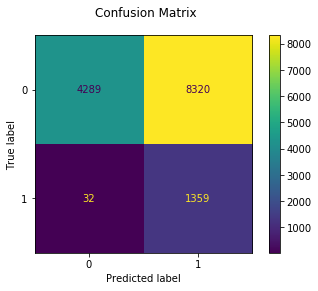

In [175]:
report_results(gnb, X_test, y_test)

### <font color=green>5:</font> ###
__Now plot <font color=red>the ROC curve</font>, then calculate <font color=red>Area Under ROC (AUROC)</font>__

In [199]:
def plot_roc(clf):    
    y_pred = clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='GaussianNB \(AUC={})'.format(round(roc_auc, 2)))
    plt.suptitle('roc curve for nearest centroid classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right");

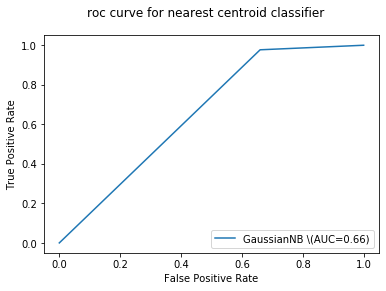

In [200]:
plot_roc(gnb)

### <font color=green>6:</font> ###
__Finally, apply a 5-fold cross validation, and report your <font color=red>mean and std values</font>.__

In [177]:
from sklearn.model_selection import cross_val_score

def apply_k_fold(clf, X, y):    
    scores = cross_val_score(clf, X, y)
    print('mean of 5-fold cross-validatoin:', round(scores.mean()*100,1), '%')
    print('std of 5-fold cross-validation:', round(scores.std()*100,1), '%')

In [178]:
apply_k_fold(gnb, X, y_binary)

mean of 5-fold cross-validatoin: 38.3 %
std of 5-fold cross-validation: 1.8 %


### <font color=green>7:</font> ###
__How are your results?__

__Is <font color=red>Gaussian Naive Bayes Classifier</font> a good one for this problem?__

## No GNB has not a good performance for this problem

### __Repeat all the steps using <font color=green>Nearest Centroid Classifier</font> and <font color=green>Logistic Regression Classifier</font>.__ ### 
* You just need to make some changes to step 3!
* You should report all the values in steps 4, 5, and 6

### __Which one is better? Report it.__ ###

################################################
accuracy =  87.3 %
################################################
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     12609
           1       0.43      0.91      0.59      1391

    accuracy                           0.87     14000
   macro avg       0.71      0.89      0.76     14000
weighted avg       0.93      0.87      0.89     14000

################################################
Confusion matrix:
[[10944  1665]
 [  119  1272]]


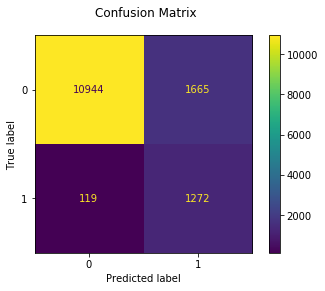

In [179]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(X_train, y_train)
report_results(nc, X_test, y_test)

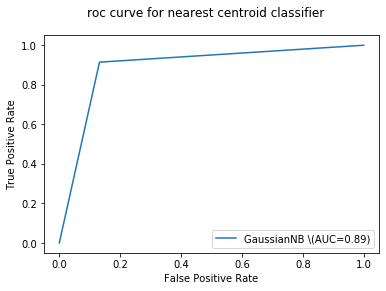

In [201]:
plot_roc(nc)

################################################
accuracy =  98.3 %
################################################
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12609
           1       0.93      0.90      0.92      1391

    accuracy                           0.98     14000
   macro avg       0.96      0.95      0.95     14000
weighted avg       0.98      0.98      0.98     14000

################################################
Confusion matrix:
[[12509   100]
 [  133  1258]]


/home/amin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


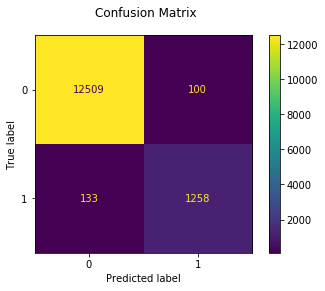

In [207]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
report_results(lr, X_test, y_test)

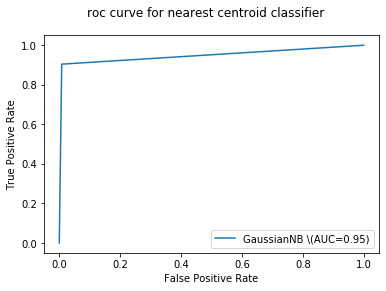

In [208]:
plot_roc(lr)

## As we can see the Logistic Regression Model has performed best

_________________________________________________________

### <font color=blue>I hope you learned all the materials covered in the hands-on sessions.</font> ###
### <font color=blue>Good luck :)</font> ###